In [1]:
# load remaining libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
1+1


2

In [3]:
print("1st lab of TOCII 2")
print("Name: Fatima Mahmood")
print("Seat No: B16158026")
print("Class: 4th Year --> 7th Semester")

1st lab of TOCII 2
Name: Fatima Mahmood
Seat No: B16158026
Class: 4th Year --> 7th Semester


In [4]:
# numpy is a numeric library 
# run command to import numpy
import numpy as np

In [5]:
np.random

<module 'numpy.random' from 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Anaconda3_64\\lib\\site-packages\\numpy\\random\\__init__.py'>

In [6]:
np.random.randn(3)

array([ 0.59099976, -0.7762049 ,  0.59803303])

In [7]:
#reading data from excel
#run command to import pandas
import pandas as pd

In [8]:
print(pd.__version__)

0.23.0


In [9]:
# STEP 1: PREPARE THE DATA TO BE MINED
# pandas provide several methods for reading data in different formats.
# Here we'll read it in as JSON but you can read in CSV and Excel files as well.

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length' , 'sepal-width ', 'petal-length' , 'petal-width' , 'class']
dataset = pd.read_csv(url,names=names)

In [10]:
#shape
#we can get a quick idea of how many instances (rows) and how many attributes(column)
print(dataset.shape)

(150, 5)


In [11]:
#it is also always a good idea to actually eyeball the data
print(dataset.head(20))

    sepal-length  sepal-width   petal-length  petal-width        class
0            5.1           3.5           1.4          0.2  Iris-setosa
1            4.9           3.0           1.4          0.2  Iris-setosa
2            4.7           3.2           1.3          0.2  Iris-setosa
3            4.6           3.1           1.5          0.2  Iris-setosa
4            5.0           3.6           1.4          0.2  Iris-setosa
5            5.4           3.9           1.7          0.4  Iris-setosa
6            4.6           3.4           1.4          0.3  Iris-setosa
7            5.0           3.4           1.5          0.2  Iris-setosa
8            4.4           2.9           1.4          0.2  Iris-setosa
9            4.9           3.1           1.5          0.1  Iris-setosa
10           5.4           3.7           1.5          0.2  Iris-setosa
11           4.8           3.4           1.6          0.2  Iris-setosa
12           4.8           3.0           1.4          0.1  Iris-setosa
13    

In [12]:
#Now we can take a look at a summary of each attribute
#we can view this as an absolute count
#class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


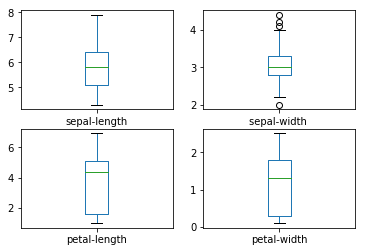

In [14]:
# Univariate : box and wisker plots
# This gives clear idea of the distribution of the input attributes
import matplotlib.pyplot as plt
dataset.plot(kind= 'box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

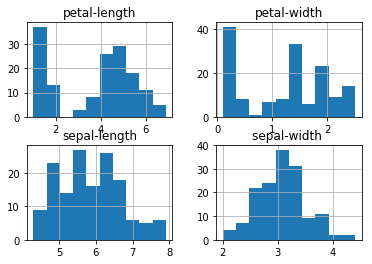

In [15]:
#histograms
dataset.hist()
plt.show()

In [16]:
print(dataset.describe())

       sepal-length  sepal-width   petal-length  petal-width
count    150.000000    150.000000    150.000000   150.000000
mean       5.843333      3.054000      3.758667     1.198667
std        0.828066      0.433594      1.764420     0.763161
min        4.300000      2.000000      1.000000     0.100000
25%        5.100000      2.800000      1.600000     0.300000
50%        5.800000      3.000000      4.350000     1.300000
75%        6.400000      3.300000      5.100000     1.800000
max        7.900000      4.400000      6.900000     2.500000


In [17]:
import scipy 
print('scipy:{}' .format(scipy.__version__))

scipy:1.1.0


In [18]:
#solution from stack overflow
#you will have t import it like this
from pandas.plotting import scatter_matrix

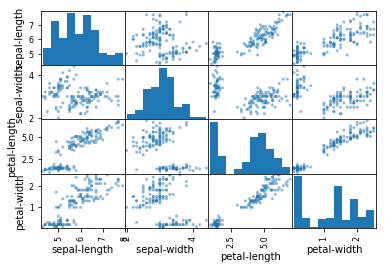

In [19]:
#scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [20]:
#skikit-learn
import sklearn
print('sklearn:{}' .format(scipy.__version__))

sklearn:1.1.0


In [21]:
from sklearn import model_selection

In [22]:
array=dataset.values
X=array[:,0:4]
Y=array[:,4]
validation_size=0.20
seed=7
X_train,X_validation,Y_train,Y_validation = model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [23]:
#STEP 03
#test harness and building models
seed=7
scoring = 'accuracy'

#build models
#spot check algorithms
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
#evaluate each model in models:
results = []
names = []
for name,model in models:
    fold = model_selection.KFold(n_splits=10,random_state=seed)
    cv_results= model_selection.cross_val_score(model,X_train,Y_train, cv=fold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f (%f)" % (name , cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


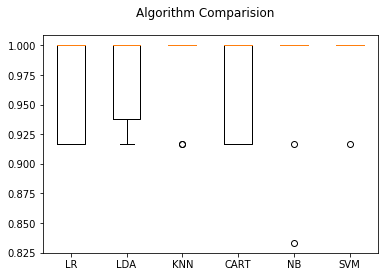

In [24]:
#STEP 03
# select best model
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [26]:
#make predications on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30

